In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [3]:
TECs=sc.read('/Users/Yi/Desktop/Aire C311Y/TECs_wo_KO_wo_cell_cycle.h5ad')

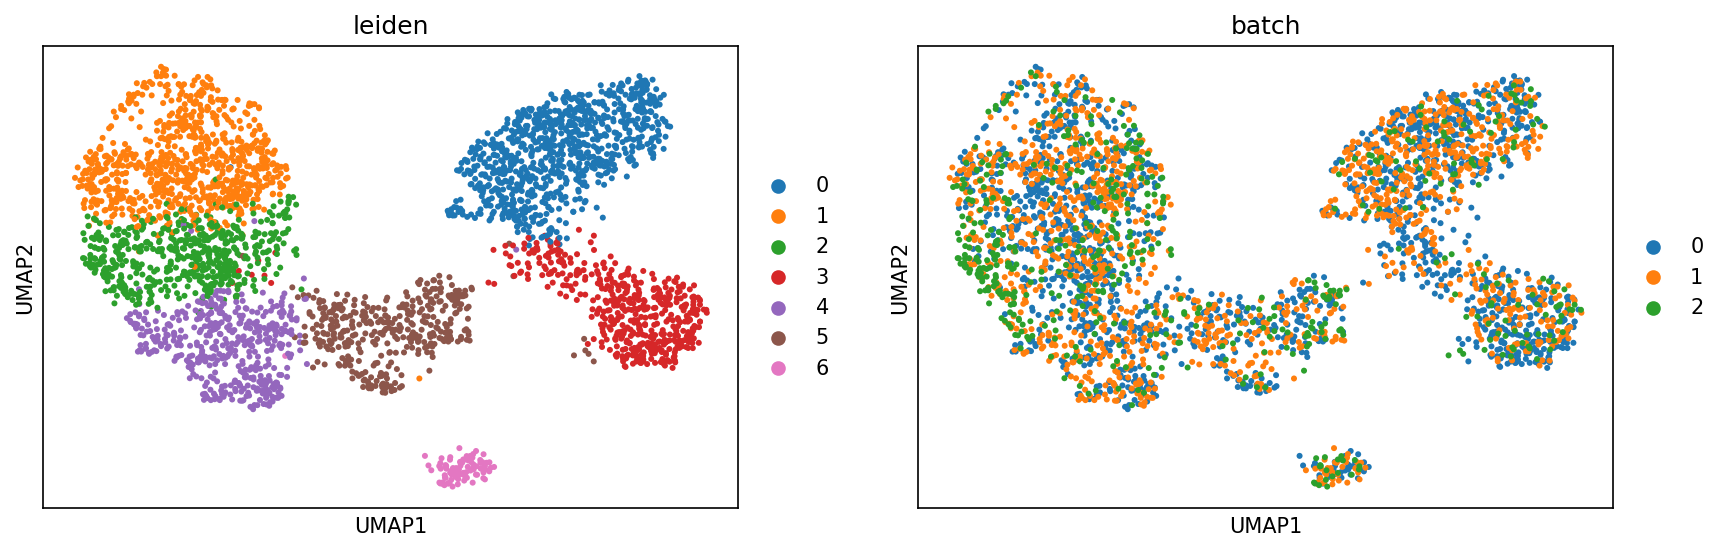

In [4]:
#umap TECs
sc.tl.leiden(TECs,resolution = 0.6)
sc.pl.umap(TECs, color=['leiden','batch'])

In [5]:
WT=TECs[TECs.obs.batch == '0']

In [6]:
#rank genes if you haven't done it yet

sc.tl.rank_genes_groups(WT,groupby = 'leiden',n_genes = -1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


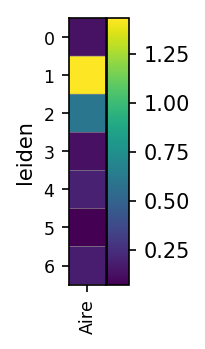

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[0.32, 0, 0.2])

In [7]:
#we want to order genes so that they match leiden category order

sc.pl.matrixplot(WT,groupby = 'leiden',var_names = 'Aire')

In [9]:
WT

View of AnnData object with n_obs × n_vars = 1663 × 2245 
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito', 'leiden'
    var: 'gene_ids-0', 'feature_types', 'n_cells-0', 'gene_ids-1', 'n_cells-1', 'gene_ids-2', 'n_cells-2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [8]:
#get dataframe of each cluster's ranked genes
dict_rank_gene_series = {}

#for range of 18 integers, starting with 0
for i in range(0,7):
    current = {'genes':WT.uns['rank_genes_groups']['names'][str(i)],'pvals_adj':WT.uns['rank_genes_groups']['pvals_adj'][str(i)],
              'logfoldchanges':WT.uns['rank_genes_groups']['logfoldchanges'][str(i)]}
    dict_rank_gene_series[i] = pd.DataFrame(current)


In [9]:
#this is one example where we first filter to indistiguishible to zero p values (not always necessary for datasets, some can be a significance threshold) and 
#then find the top fold change genes. We're going to do this for each cluster

dict_rank_gene_series[0][dict_rank_gene_series[0]['pvals_adj'] <= 1E-3].sort_values('logfoldchanges',ascending = False)[0:5]



,genes,pvals_adj,logfoldchanges
94,Gm29481,1.131273e-06,5.669368
2,Psmb11,4.268937e-98,5.376746
65,Ankmy1,7.539220e-10,4.971865
0,Ccl25,4.461960e-123,4.566851
1,Tbata,1.735126e-117,4.272700


In [10]:
#now we're going to line up all the sets of 5 genes so they match up with the ascending clusters on the heatmap/matrixplot
top_genes = []
for i in range(0,7):
    #first get the list of 5 top genes for that cluster
    current = dict_rank_gene_series[i][dict_rank_gene_series[i]
                                       ['pvals_adj'] <= 1E-3].sort_values('logfoldchanges',ascending = False)[0:5]['genes'].tolist()
    #add it to the 'back' of the list, such that the 0th cluster will be first and the 18th will be last once we're done
    top_genes = top_genes + current

In [11]:
#make sure the numbers add up
( 7* 5) == len(top_genes)

True

In [42]:
#let's try it out, needs scaling due to different levels of expression per gene
#sc.pl.matrixplot(WT,groupby = 'leiden',var_names = top_genes,standard_scale = 'var',swap_axes = True)

#it ends up looking pretty good, and we can try heatmap, too

In [13]:
#sc.pl.heatmap(WT,groupby = 'leiden',var_names = top_genes,standard_scale = 'var',vmax=1, vmin=0, show_gene_labels=True, save='WT_top5_DEgene_all_cluster.svg')

#two clusters are red blood cells in this case.

saving figure to file ./figures/heatmapWT_top5_DEgene_all_cluster2.svg


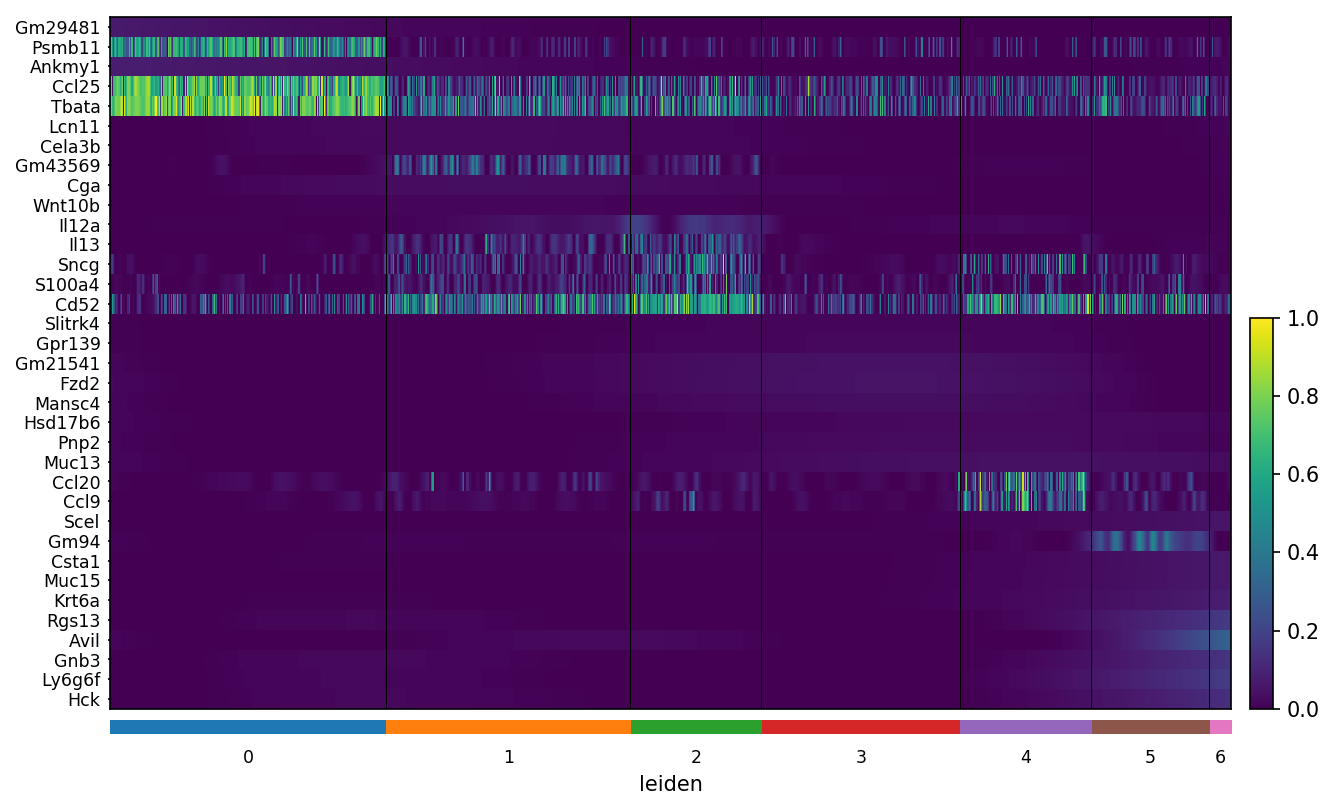

GridSpec(3, 3, height_ratios=[0, 6.3, 0.13], width_ratios=[10, 0, 0.2])

In [14]:
sc.pl.heatmap(WT,groupby = 'leiden',var_names = top_genes,standard_scale = 'var',vmax=1, vmin=0,show_gene_labels=True,swap_axes = True,save='WT_top5_DEgene_all_cluster2.svg')

In [38]:
#this is one example where we first filter to indistiguishible to zero p values (not always necessary for datasets, some can be a significance threshold) and 
#then find the top fold change genes. We're going to do this for each cluster

dict_rank_gene_series[0][dict_rank_gene_series[0]['pvals_adj'] <= 1E-2].sort_values('logfoldchanges',ascending = False)[0:10]



,genes,pvals_adj,logfoldchanges
94,Gm29481,1.131273e-06,5.669368
2,Psmb11,4.268937e-98,5.376746
65,Ankmy1,7.539220e-10,4.971865
0,Ccl25,4.461960e-123,4.566851
1,Tbata,1.735126e-117,4.272700
3,Prss16,7.011625e-106,4.208745
8,Isg20,1.327481e-63,4.161514
24,Dusp28,2.938555e-23,3.941673
7,Cxcl12,4.678172e-65,3.866999
35,Hotairm1,3.477291e-17,3.803526


In [39]:
#now we're going to line up all the sets of 5 genes so they match up with the ascending clusters on the heatmap/matrixplot
top_genes = []
for i in range(0,7):
    #first get the list of 5 top genes for that cluster
    current = dict_rank_gene_series[i][dict_rank_gene_series[i]
                                       ['pvals_adj'] <= 1E-2].sort_values('logfoldchanges',ascending = False)[0:10]['genes'].tolist()
    #add it to the 'back' of the list, such that the 0th cluster will be first and the 18th will be last once we're done
    top_genes = top_genes + current

In [40]:
#make sure the numbers add up
(7*10) == len(top_genes)

True

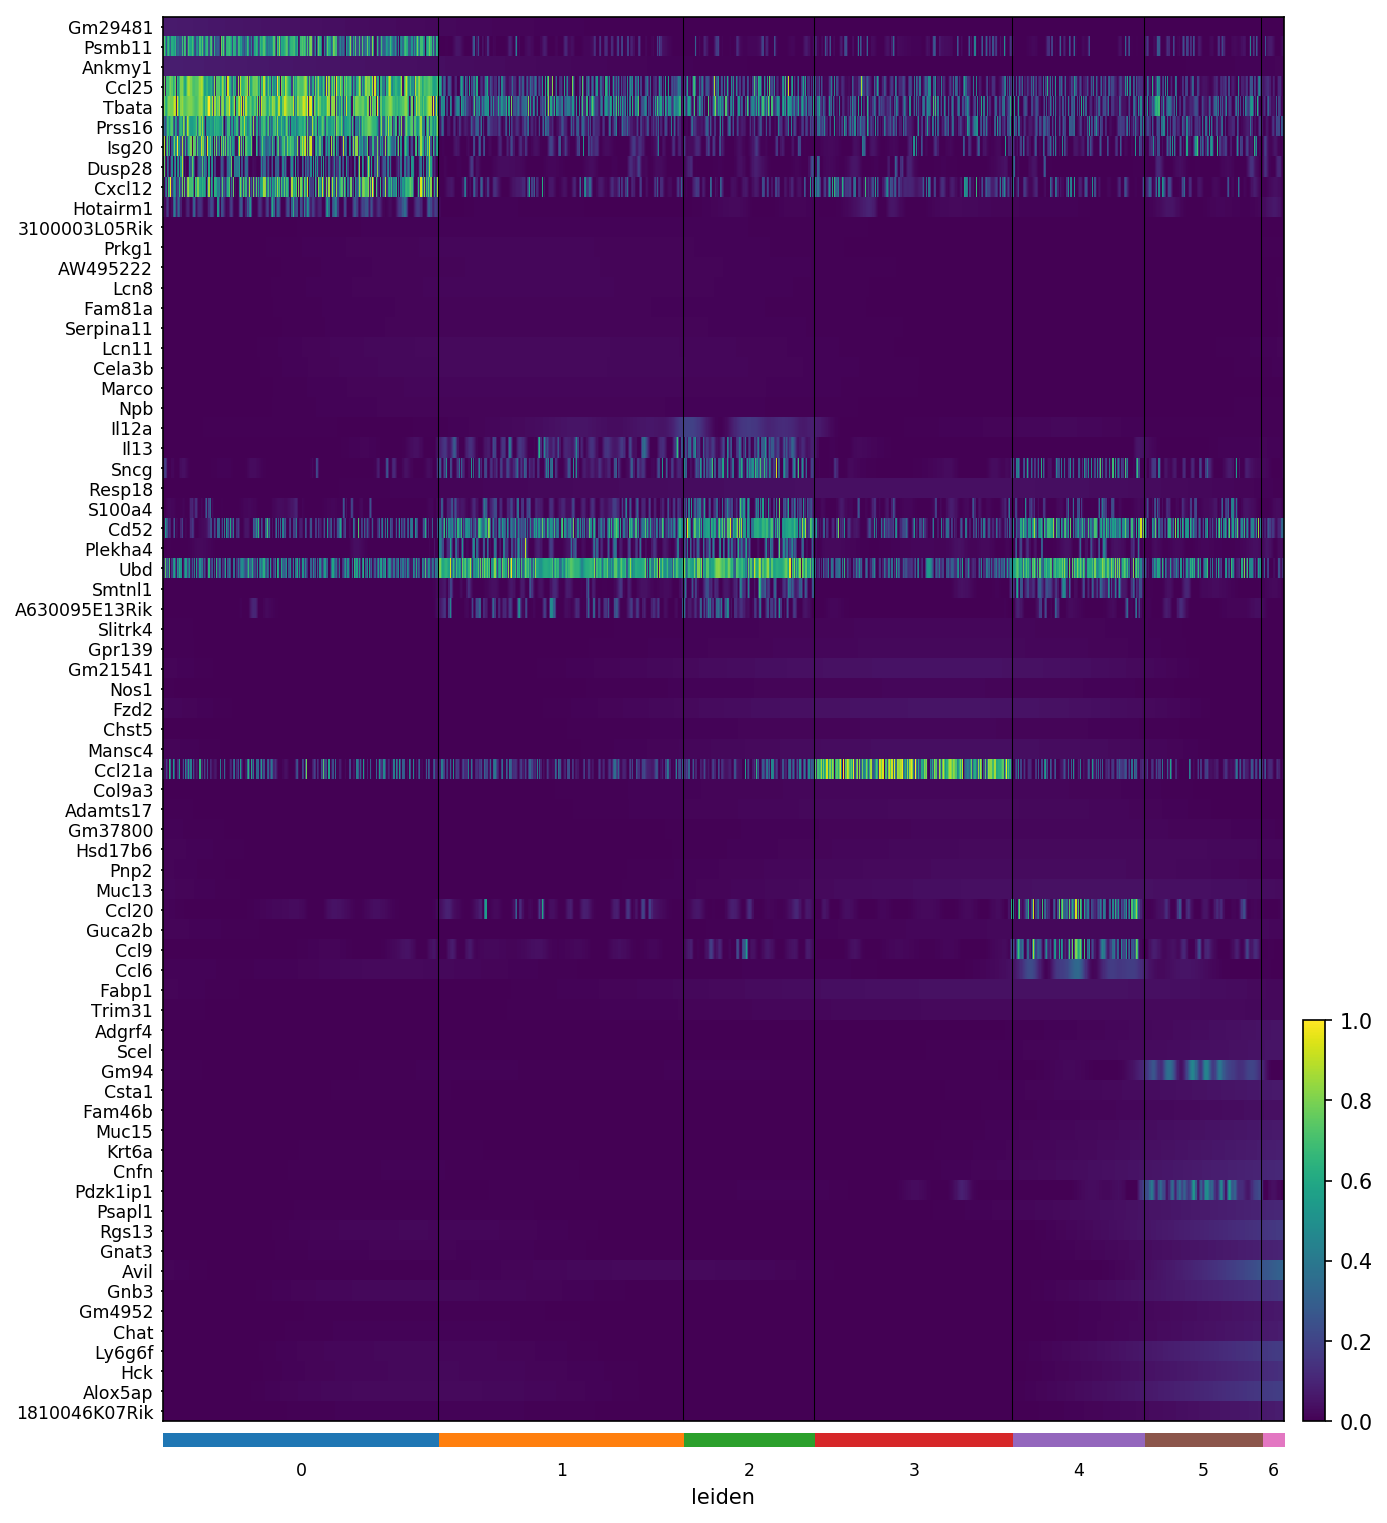

GridSpec(3, 3, height_ratios=[0, 12.6, 0.13], width_ratios=[10, 0, 0.2])

In [41]:
sc.pl.heatmap(WT,groupby = 'leiden',var_names = top_genes,standard_scale = 'var',vmax=1, vmin=0,show_gene_labels=True,swap_axes = True)